# 2 - Funciones de distribución de probabilidades

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

## Distribución uniforme

In [36]:
a=1
b=100
n=200000
data_uniform = np.random.uniform(a,b,n)

In [37]:
%matplotlib inline

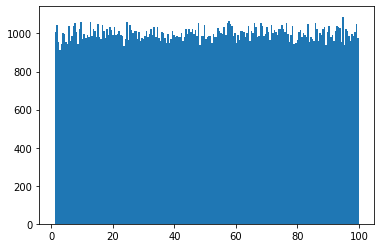

In [38]:
plot = plt.hist(data_uniform, bins=200)

## Distribución normal

In [51]:
data_normal = np.random.randn(1000000)

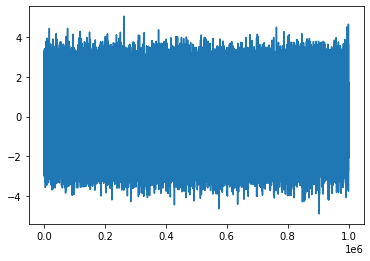

In [55]:
plt.plot(data_normal)

(array([2.00000e+00, 6.00000e+00, 3.70000e+01, 1.26000e+02, 4.07000e+02,
        1.18800e+03, 3.13800e+03, 7.28300e+03, 1.56950e+04, 2.88380e+04,
        4.86970e+04, 7.34900e+04, 9.92310e+04, 1.20251e+05, 1.31391e+05,
        1.28272e+05, 1.11667e+05, 8.76200e+04, 6.17910e+04, 3.91800e+04,
        2.20210e+04, 1.12400e+04, 5.12400e+03, 2.11100e+03, 8.12000e+02,
        2.70000e+02, 8.80000e+01, 1.80000e+01, 5.00000e+00, 1.00000e+00]),
 array([-4.89526977, -4.56387876, -4.23248774, -3.90109673, -3.56970572,
        -3.2383147 , -2.90692369, -2.57553268, -2.24414166, -1.91275065,
        -1.58135964, -1.24996862, -0.91857761, -0.5871866 , -0.25579558,
         0.07559543,  0.40698644,  0.73837746,  1.06976847,  1.40115948,
         1.7325505 ,  2.06394151,  2.39533252,  2.72672354,  3.05811455,
         3.38950556,  3.72089658,  4.05228759,  4.3836786 ,  4.71506962,
         5.04646063]),
 <BarContainer object of 30 artists>)

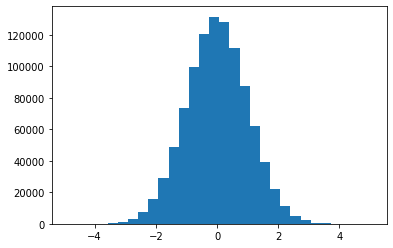

In [57]:
plt.hist(data_normal, bins=30)

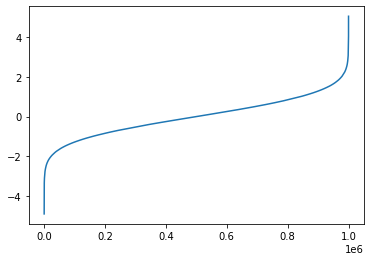

In [58]:
plt.plot(x,sorted(data_normal))

In [76]:
mu = 5.5
sd = 2.5
z_10000 = np.random.randn(10000)
data_normal_with_mu_sd =  mu + sd * z_10000

(array([   3.,    4.,    6.,   13.,   27.,   50.,   81.,  153.,  226.,
         361.,  525.,  651.,  827.,  936.,  988., 1030.,  928.,  864.,
         713.,  554.,  387.,  289.,  182.,   84.,   65.,   25.,   17.,
           5.,    2.,    4.]),
 array([-4.12895796, -3.49285947, -2.85676098, -2.2206625 , -1.58456401,
        -0.94846552, -0.31236703,  0.32373146,  0.95982995,  1.59592843,
         2.23202692,  2.86812541,  3.5042239 ,  4.14032239,  4.77642087,
         5.41251936,  6.04861785,  6.68471634,  7.32081483,  7.95691331,
         8.5930118 ,  9.22911029,  9.86520878, 10.50130727, 11.13740576,
        11.77350424, 12.40960273, 13.04570122, 13.68179971, 14.3178982 ,
        14.95399668]),
 <BarContainer object of 30 artists>)

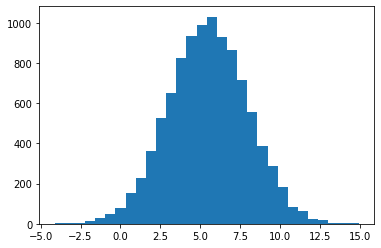

In [77]:
plt.hist(data_normal_with_mu_sd, bins=30)

In [78]:
np.random.randn(2,4)

array([[ 0.01030718, -0.4644574 ,  0.57684096,  0.02686598],
       [ 0.87840444,  0.67151012, -1.09223453, -0.55985455]])

## La simulación de Monte Carlo

1. Generamos 2 números aleatorios uniforme entre 0 y 1 en total 1000 veces
2. Calcularemos x^2 + y^2
    * Si el valor es inferior a 1 estamos dentro del círculo
    * Si el calor es superior a 1 estamos fuera del círculo
3. Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo
4. Usamos dicha probabilidad para aproximar el valor de pi
5. Repetimos el experimento un número suficiente de veces para obtener (100) diferentes aproximaciones de pi
6. Calculamos el promedio de los 1000 experimentos anterior para dar un valor final de pi

In [27]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.142924000000001


(3.142924000000001, [<matplotlib.lines.Line2D at 0x7f8aa2fa4350>])

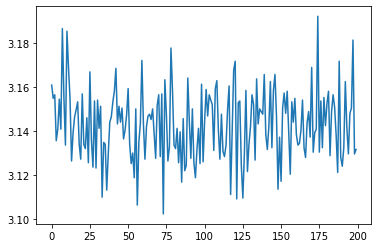

In [28]:
pi_montecarlo(10000, 200)

## Dummy Data Sets

In [35]:
n = 100000
data = pd.DataFrame({
    'A': np.random.randn(n),
    'B': 1.5 + 2.5 * np.random.randn(n),
    'C': np.random.uniform(5,32,n)
})

In [36]:
data.head()

,A,B,C
0,-0.522277,-0.463414,11.535015
1,-1.555277,0.798538,21.567172
2,0.225087,-0.187471,16.704550
3,0.822391,4.709252,9.319566
4,-1.391412,1.300627,18.979805


In [37]:
data.describe()

,A,B,C
count,100000.000000,100000.000000,100000.000000
mean,-0.002120,1.499707,18.544511
std,1.005219,2.506401,7.787964
min,-4.297263,-9.303629,5.000019
25%,-0.679956,-0.180397,11.822889
50%,-0.003557,1.502860,18.575956
75%,0.676291,3.193287,25.283179
max,4.564201,12.564629,31.999408


(array([3.1000e+01, 5.4100e+02, 4.5650e+03, 1.7536e+04, 3.2699e+04,
        2.9088e+04, 1.2665e+04, 2.6080e+03, 2.5700e+02, 1.0000e+01]),
 array([-4.29726334, -3.41111688, -2.52497042, -1.63882396, -0.75267751,
         0.13346895,  1.01961541,  1.90576187,  2.79190833,  3.67805478,
         4.56420124]),
 <BarContainer object of 10 artists>)

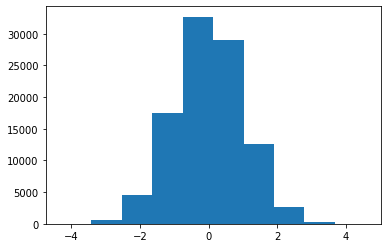

In [38]:
plt.hist(data['A'])